In [654]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")


In [655]:

hmw_data = pd.read_csv("./homework4.csv")
hmw_data = hmw_data.rename(columns={"Unnamed: 0":"data id"})
hmw_data.head(5)

,data id,x1,x2,x3,d,y
0,1,0.789667,0.186084,0.601233,True,1.775711
1,2,0.091169,0.018968,0.602491,False,0.702007
2,3,0.839708,0.137707,0.439575,False,4.818743
3,4,0.373535,0.177271,0.419393,False,2.921435
4,5,0.141337,0.785985,0.140322,False,0.663376


In [656]:

empty_dict = {'estimator-name': [0] * 13, 'mean-ATE': [0] * 13, 'CI-ATE': [0] * 13}

est_table = pd.DataFrame(empty_dict)

est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


<h3>Estimator 0</h3>

In [657]:
#Function to run estimator 0, 1.1,1.2,2.1,2.2 easier

def est_regression(data,est_type):
    est_0_data = data
    num_sim = 200
    sample_size = 500

    beta_arr = []

    for i in range(0,num_sim,1):
    
            # get a sample with replacement from the DataFrame
            sample = est_0_data.sample(n=sample_size, replace=True)

            # X = hmw_data[["x1","x2","x3","d"]]
            if(est_type == "estimator_0"):
                X = sample[["d"]]
                y = sample[["y"]]

            elif(est_type == "estimator_1_1"):
                X = sample[['d','x1','x2','x3']]
                y = sample[["y"]]
                
            elif(est_type == "estimator_1_2"):
                X = sample[['d','x1']]
                y = sample[["y"]]
            
            elif(est_type == "estimator_2_1"):
                

                # Define the outcome variable and the covariates
                X = sample[['x1','x2','x3']]
                y = sample[["d"]]

                # Fit a logistic regression model
                logit = LogisticRegression(solver='lbfgs', max_iter=1000)
                logit.fit(X, y)

                # Calculate the propensity score
                y_pred = logit.predict_proba(X)[:, 1]

                sample.reset_index(inplace=True)

                hmw_data_new = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_1'])], axis=1)
                
                X = hmw_data_new[['d','p_est_1']]
                y = hmw_data_new[["y"]]

            elif(est_type == "estimator_2_2"):
                # Define the outcome variable and the covariates
                X = sample[['x1']]
                y = sample[["d"]]

                # Fit a logistic regression model
                logit = LogisticRegression(solver='lbfgs', max_iter=1000)
                logit.fit(X, y)

                # Calculate the propensity score
                y_pred = logit.predict_proba(X)[:, 1]

                sample.reset_index(inplace=True)

                hmw_data_new = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_2'])], axis=1)
                



                X = hmw_data_new[['d','p_est_2']]
                y = hmw_data_new[["y"]]
            
            else:
                
                raise ValueError("Please enter a good estimator type!!")
                 

            regressor = LinearRegression()
            regressor.fit(X, y)
            
            # Get the model estimates
            coefficients = regressor.coef_
            # intercept = regressor.intercept_

            # Print the estimates
            # print("Coefficients:", coefficients)
            # print("Intercept:", intercept)

            

            beta_arr.append(coefficients[0][0])
    return beta_arr

In [658]:
#Function to calculate the ATE and CI 
def ate_ci(est_arr,est_index,est_name):
    mean = np.mean(est_arr)
    std_dev = np.std(est_arr)

    # Calculate the standard error of the mean
    std_error = std_dev / np.sqrt(len(est_arr))

    # Calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
    t_value = stats.t.ppf(0.975, len(est_arr)-1)

    # Calculate the confidence interval
    confidence_interval = (round(mean - t_value * std_error,4),round( mean + t_value * std_error,4))

    est_table.loc[est_index,"estimator-name"] = est_name
    est_table.loc[est_index,"mean-ATE"] = mean
    est_table.loc[est_index,"CI-ATE"] = str(confidence_interval)

    print("mean: ",mean)
    print("95% Confidence Interval:", confidence_interval)

In [659]:
est_0_data = hmw_data[['d','y']]
est_0_arr = est_regression(est_0_data,"estimator_0")
len(est_0_arr)

200

In [660]:
ate_ci(est_0_arr,0,"estimator 0")

mean:  1.4375672824725318
95% Confidence Interval: (1.4095, 1.4656)


In [661]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,0,0.000000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0


In [662]:

# est_0_data = hmw_data[['d','y']]
# num_sim = 200
# sample_size = 500

# beta_arr = []

# for i in range(0,num_sim,1):
 
#         # get a sample with replacement from the DataFrame
#         sample = est_0_data.sample(n=sample_size, replace=True)

#         # X = hmw_data[["x1","x2","x3","d"]]
#         X = sample[["d"]]
#         y = sample[["y"]]

#         regressor = LinearRegression()
#         regressor.fit(X, y)
        
#         # Get the model estimates
#         coefficients = regressor.coef_
#         intercept = regressor.intercept_

#         # Print the estimates
#         # print("Coefficients:", coefficients)
#         # print("Intercept:", intercept)

#         beta_arr.append(coefficients[0][0])

# len(beta_arr)

In [663]:
# mean = np.mean(beta_arr)
# std_dev = np.std(beta_arr)

# # Calculate the standard error of the mean
# std_error = std_dev / np.sqrt(len(beta_arr))

# # Calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
# t_value = stats.t.ppf(0.975, len(beta_arr)-1)

# # Calculate the confidence interval
# confidence_interval = (round(mean - t_value * std_error,4),round( mean + t_value * std_error,4))

# est_table.loc[0,"estimator-name"] = "estimator 0"
# est_table.loc[0,"mean-ATE"] = mean
# est_table.loc[0,"CI-ATE"] = str(confidence_interval)

# print("mean: ",mean)
# print("95% Confidence Interval:", confidence_interval)

<h3>Estimator 1.1</h3>

In [664]:
est_1_1_data = hmw_data[['x1','x2','x3','d','y']]
est_1_1_arr = est_regression(est_1_1_data,"estimator_1_1")
len(est_1_1_arr)

200

In [665]:
ate_ci(est_1_1_arr,1,"estimator 1.1")

mean:  1.063886118967004
95% Confidence Interval: (1.0354, 1.0923)


In [666]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0


<h3>Estimator 1.2</h3>

In [667]:
est_1_2_data = hmw_data[['d','x1','y']]
est_1_2_arr = est_regression(est_1_2_data,"estimator_1_2")
len(est_1_2_arr)

200

In [668]:
ate_ci(est_1_2_arr,2,"estimator 1.2")

mean:  1.310226376624852
95% Confidence Interval: (1.2822, 1.3382)


In [669]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,0,0.000000,0
4,0,0.000000,0


<h3>Estimator 2.1</h3>

In [670]:
est_2_1_data = hmw_data[['d','x1','x2','x3','y']]
est_2_1_arr = est_regression(est_2_1_data,"estimator_2_1")
len(est_2_1_arr)

200

In [671]:
ate_ci(est_2_1_arr,3,"estimator 2.1")

mean:  1.0263042878043356
95% Confidence Interval: (0.9975, 1.0551)


In [672]:
est_table.head(5)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,0,0.000000,0


<h3>Estimator 2.2</h3>


In [673]:
est_2_2_data = hmw_data
est_2_2_arr = est_regression(est_2_2_data,"estimator_2_2")
len(est_2_2_arr)

200

In [674]:
ate_ci(est_2_2_arr,4,"estimator 2.2")

mean:  1.3096376402437264
95% Confidence Interval: (1.2839, 1.3354)


In [675]:
est_table.head(6)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,0,0.000000,0


<h3>Estimator 3.1</h3>

In [676]:

num_sim = 200
sample_size = 500

est_3_1_arr = []

for i in range(0,num_sim,1):

        # get a sample with replacement from the DataFrame
        sample = hmw_data.sample(n=sample_size, replace=True)

        X = sample[['x1','x2','x3']]
        y = sample[["d"]]

        # Fit a logistic regression model
        logit = LogisticRegression(solver='lbfgs', max_iter=1000)
        logit.fit(X, y)

        # Calculate the propensity score
        y_pred = logit.predict_proba(X)[:, 1]

        sample.reset_index(inplace=True)

        sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_1'])], axis=1)

        first_sum =  np.sum((sample['d']*sample['y'])/(sample['p_est_1']))
        second_sum = np.sum(((1-sample['d'])*sample['y'])/(1-sample['p_est_1']))

        treat_est_3_1 = (1/len(sample))*(first_sum-second_sum)
        est_3_1_arr.append(treat_est_3_1)
# np.mean(est_treat_arr)
len(est_3_1_arr)

200

In [677]:
ate_ci(est_3_1_arr,5,"estimator 3.1")

mean:  1.044446288579411
95% Confidence Interval: (1.0164, 1.0725)


In [678]:
est_table.head(10)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
6,0,0.000000,0
7,0,0.000000,0
8,0,0.000000,0
9,0,0.000000,0


<h3>Estimator 3.2</h3>

In [679]:
num_sim = 200
sample_size = 500

est_3_2_arr = []

for i in range(0,num_sim,1):

        # get a sample with replacement from the DataFrame
        sample = hmw_data.sample(n=sample_size, replace=True)

        X = sample[['x1']]
        y = sample[["d"]]

        # Fit a logistic regression model
        logit = LogisticRegression(solver='lbfgs', max_iter=1000)
        logit.fit(X, y)

        # Calculate the propensity score
        y_pred = logit.predict_proba(X)[:, 1]

        sample.reset_index(inplace=True)

        sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_2'])], axis=1)

        first_sum =  np.sum((sample['d']*sample['y'])/(sample['p_est_2']))
        second_sum = np.sum(((1-sample['d'])*sample['y'])/(1-sample['p_est_2']))

        treat_est_3_2 = (1/len(sample))*(first_sum-second_sum)
        est_3_2_arr.append(treat_est_3_2)
# np.mean(est_treat_arr)
len(est_3_2_arr)

200

In [680]:
ate_ci(est_3_2_arr,6,"estimator 3.2")

mean:  1.302204731598819
95% Confidence Interval: (1.2748, 1.3296)


In [681]:
est_table.head(10)

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
6,estimator 3.2,1.302205,"(1.2748, 1.3296)"
7,0,0.000000,0
8,0,0.000000,0
9,0,0.000000,0


<h3>Estimator 4.1</h3>

In [682]:
import warnings

warnings.filterwarnings("ignore")

num_sim = 200
sample_size = 500

est_4_1_arr = []

for i in range(0,num_sim,1):

     # get a sample with replacement from the DataFrame
    sample = hmw_data.sample(n=sample_size, replace=True)

    X = sample[['x1','x2','x3']]
    y = sample[["d"]]

    # Fit a logistic regression model
    logit = LogisticRegression(solver='lbfgs', max_iter=1000)
    logit.fit(X, y)

    # Calculate the propensity score
    y_pred = logit.predict_proba(X)[:, 1]

    sample.reset_index(inplace=True)

    sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_1'])], axis=1)

    control_data = sample[sample['d'] == 0]
    treat_data = sample[sample['d'] == 1]

    max_p_1_ctr = max(control_data['p_est_1'])
    max_p_1_treat = max(treat_data['p_est_1'])

    min_p_1_ctr = min(control_data['p_est_1'])
    min_p_1_treat = min(treat_data['p_est_1'])

    upper_filter = min(max_p_1_treat,max_p_1_ctr)
    lower_filter = max(min_p_1_treat,min_p_1_ctr)

    hmw_data_new_2 = sample[(sample['p_est_1'] < upper_filter) & (sample['p_est_1'] > lower_filter)]
    len(hmw_data_new_2)

    # Split the dataframe into equally spaced groups
    n_groups = 20  # number of groups
    hmw_data_new_2['Group'] = pd.qcut(hmw_data_new_2['y'], q=n_groups, labels=False,duplicates='drop')
    # hmw_data_new_2['Group'].unique()
    hmw_data_new_2 = hmw_data_new_2.sort_values(by=['Group'])

    single_trt_est_1 = 0

    for i in range(0,20,1): 
        sub_group = hmw_data_new_2[hmw_data_new_2['Group'] == i]
        sub_group = sub_group.reset_index()
        # print((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        first_sum =  np.sum((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        
        second_sum = np.sum(((1-sub_group['d'])*sub_group['y'])/(1-sub_group['p_est_1']))

        treat_est_3_1 = (1/len(sub_group))*(first_sum-second_sum)
        # print(treat_est_3_1)
        single_trt_est_1 = single_trt_est_1 + (treat_est_3_1*(len(sub_group)/len(hmw_data_new_2)))

    est_4_1_arr.append(single_trt_est_1)


In [683]:
ate_ci(est_4_1_arr,7,"estimator 4.1")

mean:  1.015535265223918
95% Confidence Interval: (0.9871, 1.0439)


In [684]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
6,estimator 3.2,1.302205,"(1.2748, 1.3296)"
7,estimator 4.1,1.015535,"(0.9871, 1.0439)"
8,0,0.000000,0
9,0,0.000000,0


<h3>Estimator 4.2</h3>

In [685]:


num_sim = 200
sample_size = 500

est_4_2_arr = []

for i in range(0,num_sim,1):

    # get a sample with replacement from the DataFrame
    sample = hmw_data.sample(n=sample_size, replace=True)

    X = sample[['x1']]
    y = sample[["d"]]

    # Fit a logistic regression model
    logit = LogisticRegression(solver='lbfgs', max_iter=1000)
    logit.fit(X, y)

    # Calculate the propensity score
    y_pred = logit.predict_proba(X)[:, 1]

    sample.reset_index(inplace=True)

    sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_2'])], axis=1)

    control_data = sample[sample['d'] == 0]
    treat_data = sample[sample['d'] == 1]

    max_p_1_ctr = max(control_data['p_est_2'])
    max_p_1_treat = max(treat_data['p_est_2'])

    min_p_1_ctr = min(control_data['p_est_2'])
    min_p_1_treat = min(treat_data['p_est_2'])

    upper_filter = min(max_p_1_treat,max_p_1_ctr)
    lower_filter = max(min_p_1_treat,min_p_1_ctr)

    hmw_data_new_2 = sample[(sample['p_est_2'] < upper_filter) & (sample['p_est_2'] > lower_filter)]
    len(hmw_data_new_2)

    # Split the dataframe into equally spaced groups
    n_groups = 20  # number of groups
    hmw_data_new_2['Group'] = pd.qcut(hmw_data_new_2['y'], q=n_groups, labels=False,duplicates='drop')
    # hmw_data_new_2['Group'].unique()
    hmw_data_new_2 = hmw_data_new_2.sort_values(by=['Group'])

    single_trt_est_2 = 0

    for i in range(0,20,1): 
        sub_group = hmw_data_new_2[hmw_data_new_2['Group'] == i]
        sub_group = sub_group.reset_index()
        # print((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        first_sum =  np.sum((sub_group['d']*sub_group['y'])/(sub_group['p_est_2']))
        
        second_sum = np.sum(((1-sub_group['d'])*sub_group['y'])/(1-sub_group['p_est_2']))

        treat_est_3_2 = (1/len(sub_group))*(first_sum-second_sum)
        # print(treat_est_3_1)
        single_trt_est_2 = single_trt_est_2 + (treat_est_3_2*(len(sub_group)/len(hmw_data_new_2)))

    est_4_2_arr.append(single_trt_est_2)


In [686]:
ate_ci(est_4_2_arr,8,"estimator 4.2")

mean:  1.2727242031011345
95% Confidence Interval: (1.2438, 1.3017)


In [687]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
6,estimator 3.2,1.302205,"(1.2748, 1.3296)"
7,estimator 4.1,1.015535,"(0.9871, 1.0439)"
8,estimator 4.2,1.272724,"(1.2438, 1.3017)"
9,0,0.000000,0


<h3>Estimator 5.1</h3>

In [688]:


num_sim = 200
sample_size = 500

est_5_1_arr = []

for i in range(0,num_sim,1):
     # get a sample with replacement from the DataFrame
    sample = hmw_data.sample(n=sample_size, replace=True)

    X = sample[['x1','x2','x3']]
    y = sample[["d"]]

    # Fit a logistic regression model
    logit = LogisticRegression(solver='lbfgs', max_iter=1000)
    logit.fit(X, y)

    # Calculate the propensity score
    y_pred = logit.predict_proba(X)[:, 1]

    sample.reset_index(inplace=True)

    sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_1'])], axis=1)
    weigth_1 = np.sqrt((sample['d']/sample['p_est_1'])+((1-sample['d'])/(1-sample['p_est_1'])))

    X = sample[['d','x1','x2','x3']]
    y = sample[["y"]]

    regressor = LinearRegression()
    regressor.fit(X, y,sample_weight=weigth_1)

    # Get the model estimates
    coefficients = regressor.coef_
    # intercept = regressor.intercept_

    # Print the estimates
    # print("Coefficients:", coefficients)
    # print("Intercept:", intercept)

    est_5_1_arr.append(coefficients[0][0])

len(est_5_1_arr)

200

In [689]:
ate_ci(est_5_1_arr,9,"estimator 5.1")

mean:  1.027131588528118
95% Confidence Interval: (0.9974, 1.0569)


In [690]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
6,estimator 3.2,1.302205,"(1.2748, 1.3296)"
7,estimator 4.1,1.015535,"(0.9871, 1.0439)"
8,estimator 4.2,1.272724,"(1.2438, 1.3017)"
9,estimator 5.1,1.027132,"(0.9974, 1.0569)"


<h3>Estimator 5.2</h3>

In [691]:


num_sim = 200
sample_size = 500

est_5_2_arr = []

for i in range(0,num_sim,1):
    # get a sample with replacement from the DataFrame
    sample = hmw_data.sample(n=sample_size, replace=True)

    X = sample[['x1']]
    y = sample[["d"]]

    # Fit a logistic regression model
    logit = LogisticRegression(solver='lbfgs', max_iter=1000)
    logit.fit(X, y)

    # Calculate the propensity score
    y_pred = logit.predict_proba(X)[:, 1]

    sample.reset_index(inplace=True)

    sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_2'])], axis=1)
    weigth_2 = np.sqrt((sample['d']/sample['p_est_2'])+((1-sample['d'])/(1-sample['p_est_2'])))

    X = sample[['d','x1','x2','x3']]
    y = sample[["y"]]

    regressor = LinearRegression()
    regressor.fit(X, y,sample_weight=weigth_2)

    # Get the model estimates
    coefficients = regressor.coef_
    # intercept = regressor.intercept_

    # Print the estimates
    # print("Coefficients:", coefficients)
    # print("Intercept:", intercept)

    est_5_2_arr.append(coefficients[0][0])

len(est_5_2_arr)

200

In [692]:
ate_ci(est_5_2_arr,10,"estimator 5.2")

mean:  1.044732976312817
95% Confidence Interval: (1.0205, 1.069)


<h1>Problem 1</h1>

In [693]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
2,estimator 1.2,1.310226,"(1.2822, 1.3382)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
4,estimator 2.2,1.309638,"(1.2839, 1.3354)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
6,estimator 3.2,1.302205,"(1.2748, 1.3296)"
7,estimator 4.1,1.015535,"(0.9871, 1.0439)"
8,estimator 4.2,1.272724,"(1.2438, 1.3017)"
9,estimator 5.1,1.027132,"(0.9974, 1.0569)"


<h1>Problem 2</h1>

In [694]:
subset = est_table.loc[est_table['estimator-name'].isin(['estimator 0', 'estimator 1.1','estimator 2.1','estimator 3.1','estimator 4.1','estimator 5.1'])]
subset

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.437567,"(1.4095, 1.4656)"
1,estimator 1.1,1.063886,"(1.0354, 1.0923)"
3,estimator 2.1,1.026304,"(0.9975, 1.0551)"
5,estimator 3.1,1.044446,"(1.0164, 1.0725)"
7,estimator 4.1,1.015535,"(0.9871, 1.0439)"
9,estimator 5.1,1.027132,"(0.9974, 1.0569)"


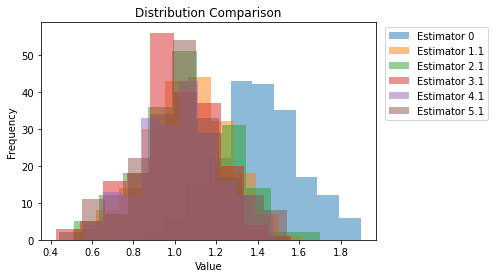

In [523]:

# Plot histograms of the three distributions
plt.hist(est_0_arr, alpha=0.5, label='Estimator 0')
plt.hist(est_1_1_arr, alpha=0.5, label='Estimator 1.1')
plt.hist(est_2_1_arr, alpha=0.5, label='Estimator 2.1')
plt.hist(est_3_1_arr, alpha=0.5, label='Estimator 3.1')
plt.hist(est_4_1_arr, alpha=0.5, label='Estimator 4.1')
plt.hist(est_5_1_arr, alpha=0.5, label='Estimator 5.1')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
plt.show()

all the estimators seem to be similary distributed centered closely to the true ATE of 1 and they seems to have similar n variantion and normally distributed with  the expeption of estimator 0 which looks like is centered close to 1.4. With expeception to the estimator 0, all the other estimators are really close to 1 which is the true ATE.

<h1>Problem 3</h1>

In [524]:
subset = est_table.loc[est_table['estimator-name'].isin(['estimator 0', 'estimator 1.2','estimator 2.2','estimator 3.2','estimator 4.2','estimator 5.2'])]
subset

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.404148,"(1.3771, 1.4312)"
2,estimator 1.2,1.302731,"(1.2749, 1.3305)"
4,estimator 2.2,1.306622,"(1.28, 1.3332)"
6,estimator 3.2,1.288637,"(1.2629, 1.3144)"
8,estimator 4.2,1.266943,"(1.2388, 1.295)"
10,estimator 5.2,1.030578,"(1.0049, 1.0563)"


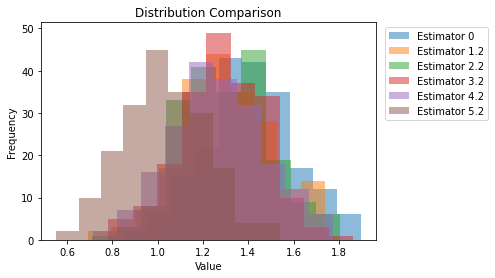

In [525]:
# Plot histograms of the three distributions
plt.hist(est_0_arr, alpha=0.5, label='Estimator 0')
plt.hist(est_1_2_arr, alpha=0.5, label='Estimator 1.2')
plt.hist(est_2_2_arr, alpha=0.5, label='Estimator 2.2')
plt.hist(est_3_2_arr, alpha=0.5, label='Estimator 3.2')
plt.hist(est_4_2_arr, alpha=0.5, label='Estimator 4.2')
plt.hist(est_5_2_arr, alpha=0.5, label='Estimator 5.2')


plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
plt.show()

almost all estimators seem to do bad and look like the are centered with mean somewhere around 1.4 with the expeption of estimator 5.2 which looks good being almost centered around the true ATE of 1. Besides estimator 5.2, all the estimators seem to have a normal distribution with similar variance. 

Since 5.2 is robust, it was not affected by the incorrect specification of the propensety score and we can see that in fact estimated the true mean pretty close to 1. It is a great benefit to have robust estimators that are not affected too much as long as the conditional expectation function of y is correctly specified.

<h1>Problem 4</h1>

We can see, that if we dont violate the assumptions of unconfoundeness (meaning we observe all the factor that affect treatment assigment and are correlated with the potential outcom) and overlap we can get good estimators close the the TRUE ATE. Estimators 1.1,2.1,3.1,4.1,5.1,5.2 work perfectly because this assumptions are meet even though for 5.2 the propensity score is wrongfully specified, since the regression is correct then we get good estimate. For the other estimates 0,1.2,2.2,3.2,4.2 since we break the first assumption of uncounfundeness and with dont include all the variables then they fail at estimating the true ATE. 

<h1>Problem 5</h1>

Estimator 4.1 without drop

In [526]:
num_sim = 200
sample_size = 500

est_4_1_arr_no_drop = []

for i in range(0,num_sim,1):

     # get a sample with replacement from the DataFrame
    sample = hmw_data.sample(n=sample_size, replace=True)

    X = sample[['x1','x2','x3']]
    y = sample[["d"]]

    # Fit a logistic regression model
    logit = LogisticRegression(solver='lbfgs', max_iter=1000)
    logit.fit(X, y)

    # Calculate the propensity score
    y_pred = logit.predict_proba(X)[:, 1]

    sample.reset_index(inplace=True)

    sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_1'])], axis=1)

    # control_data = sample[sample['d'] == 0]
    # treat_data = sample[sample['d'] == 1]

    # max_p_1_ctr = max(control_data['p_est_1'])
    # max_p_1_treat = max(treat_data['p_est_1'])

    # min_p_1_ctr = min(control_data['p_est_1'])
    # min_p_1_treat = min(treat_data['p_est_1'])

    # upper_filter = min(max_p_1_treat,max_p_1_ctr)
    # lower_filter = max(min_p_1_treat,min_p_1_ctr)

    # hmw_data_new_2 = sample[(sample['p_est_1'] < upper_filter) & (sample['p_est_1'] > lower_filter)]
    # len(hmw_data_new_2)

    hmw_data_new_2 = sample

    # Split the dataframe into equally spaced groups
    n_groups = 20  # number of groups
    hmw_data_new_2['Group'] = pd.qcut(hmw_data_new_2['y'], q=n_groups, labels=False,duplicates='drop')
    # hmw_data_new_2['Group'].unique()
    hmw_data_new_2 = hmw_data_new_2.sort_values(by=['Group'])

    single_trt_est_1 = 0

    for i in range(0,20,1): 
        sub_group = hmw_data_new_2[hmw_data_new_2['Group'] == i]
        sub_group = sub_group.reset_index()
        # print((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        first_sum =  np.sum((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        
        second_sum = np.sum(((1-sub_group['d'])*sub_group['y'])/(1-sub_group['p_est_1']))

        treat_est_3_1 = (1/len(sub_group))*(first_sum-second_sum)
        # print(treat_est_3_1)
        single_trt_est_1 = single_trt_est_1 + (treat_est_3_1*(len(sub_group)/len(hmw_data_new_2)))

    est_4_1_arr_no_drop.append(single_trt_est_1)

In [527]:
ate_ci(est_4_1_arr_no_drop,11,"estimator 4.1 with no drop")

mean:  1.0544401469127376
95% Confidence Interval: (1.0289, 1.08)


Estimator 4.2 without drop

In [528]:

num_sim = 200
sample_size = 500

est_4_2_arr_no_drop = []

for i in range(0,num_sim,1):

    # get a sample with replacement from the DataFrame
    sample = hmw_data.sample(n=sample_size, replace=True)

    X = sample[['x1']]
    y = sample[["d"]]

    # Fit a logistic regression model
    logit = LogisticRegression(solver='lbfgs', max_iter=1000)
    logit.fit(X, y)

    # Calculate the propensity score
    y_pred = logit.predict_proba(X)[:, 1]

    sample.reset_index(inplace=True)

    sample = pd.concat([sample, pd.DataFrame(y_pred, columns=['p_est_2'])], axis=1)

    # control_data = sample[sample['d'] == 0]
    # treat_data = sample[sample['d'] == 1]

    # max_p_1_ctr = max(control_data['p_est_2'])
    # max_p_1_treat = max(treat_data['p_est_2'])

    # min_p_1_ctr = min(control_data['p_est_2'])
    # min_p_1_treat = min(treat_data['p_est_2'])

    # upper_filter = min(max_p_1_treat,max_p_1_ctr)
    # lower_filter = max(min_p_1_treat,min_p_1_ctr)

    # hmw_data_new_2 = sample[(sample['p_est_2'] < upper_filter) & (sample['p_est_2'] > lower_filter)]
    # len(hmw_data_new_2)

    hmw_data_new_2 = sample

    # Split the dataframe into equally spaced groups
    n_groups = 20  # number of groups
    hmw_data_new_2['Group'] = pd.qcut(hmw_data_new_2['y'], q=n_groups, labels=False,duplicates='drop')
    # hmw_data_new_2['Group'].unique()
    hmw_data_new_2 = hmw_data_new_2.sort_values(by=['Group'])

    single_trt_est_2 = 0

    for i in range(0,20,1): 
        sub_group = hmw_data_new_2[hmw_data_new_2['Group'] == i]
        sub_group = sub_group.reset_index()
        # print((sub_group['d']*sub_group['y'])/(sub_group['p_est_1']))
        first_sum =  np.sum((sub_group['d']*sub_group['y'])/(sub_group['p_est_2']))
        
        second_sum = np.sum(((1-sub_group['d'])*sub_group['y'])/(1-sub_group['p_est_2']))

        treat_est_3_2 = (1/len(sub_group))*(first_sum-second_sum)
        # print(treat_est_3_1)
        single_trt_est_2 = single_trt_est_2 + (treat_est_3_2*(len(sub_group)/len(hmw_data_new_2)))

    est_4_2_arr_no_drop.append(single_trt_est_2)


In [529]:
ate_ci(est_4_2_arr_no_drop,12,"estimator 4.2 with no drop")

mean:  1.3005687249358022
95% Confidence Interval: (1.2763, 1.3249)


In [530]:
est_table

,estimator-name,mean-ATE,CI-ATE
0,estimator 0,1.404148,"(1.3771, 1.4312)"
1,estimator 1.1,1.059349,"(1.0319, 1.0868)"
2,estimator 1.2,1.302731,"(1.2749, 1.3305)"
3,estimator 2.1,1.059508,"(1.0297, 1.0893)"
4,estimator 2.2,1.306622,"(1.28, 1.3332)"
5,estimator 3.1,1.007698,"(0.9809, 1.0345)"
6,estimator 3.2,1.288637,"(1.2629, 1.3144)"
7,estimator 4.1,1.031351,"(1.0046, 1.0581)"
8,estimator 4.2,1.266943,"(1.2388, 1.295)"
9,estimator 5.1,1.038174,"(1.009, 1.0673)"


We can see that when we remove the overlapping restriction for estimator 4.1 is increased the ATE and the CI is wider and for 4.2 is almost similar than before. When we remove the restriction we are supposed to see an increment in the variance but due to the way the dataset is simulated we dont see it too much. Not having the overlapping restriction is bad since we are not cutting the  places on where the distribution of the propensety scores for the control and the treatment dont have something to compare to meaning is either just control or just treatment. This is dangarous because introduce more variance to our data and damage our estimator.